In [97]:
# Dependencies
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import psycopg2
import sqlalchemy

In [98]:
county_csv = "2015_county_census_data_with_abbreviation.csv"

In [99]:
# Read our 2015 county data into pandas
county_df = pd.read_csv(county_csv)
county_df.head()

,ID,CensusId,State,State code,County,TotalPop,Men,Women,Hispanic,White,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1,1001,Alabama,AL,Autauga,55221,26745,28476,2.6,75.8,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,2,1003,Alabama,AL,Baldwin,195121,95314,99807,4.5,83.1,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,3,1005,Alabama,AL,Barbour,26932,14497,12435,4.6,46.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,4,1007,Alabama,AL,Bibb,22604,12073,10531,2.2,74.5,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,5,1009,Alabama,AL,Blount,57710,28512,29198,8.6,87.9,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [100]:
county_df.columns

Index(['ID', 'CensusId', 'State', 'State code', 'County', 'TotalPop', 'Men',
       'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific',
       'Citizen', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr',
       'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office',
       'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk',
       'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork',
       'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [101]:
crime_csv = "crime_data_w_population_and_cri.csv"

In [102]:
# Read our crime data into pandas
crime_df2 = pd.read_csv(crime_csv)
crime_df2.head()

,ID,County,State code,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,1,Yuba,CA,388.601036,538,1,4,245,73251,73251,...,27,39,213,612,1148,253,27,73340,6,115
1,2,Adams,CO,336.322153,724,1,4,247,457228,457686,...,274,238,1044,2175,9187,1464,101,469193,8,1
2,3,Alamosa,CO,178.428598,1630,1,4,248,15927,15927,...,3,3,22,52,226,15,3,16253,8,3
3,4,Arapahoe,CO,297.988700,889,1,4,249,637227,593040,...,265,552,970,2879,11787,1348,110,607070,8,5
4,5,Archuleta,CO,196.818107,1479,1,4,250,12179,12179,...,3,1,20,65,125,8,3,12194,8,7


In [103]:
crime_df2.columns

Index(['ID', 'County', 'State code', 'crime_rate_per_100000', 'index',
       'EDITION', 'PART', 'IDNO', 'CPOPARST', 'CPOPCRIM', 'AG_ARRST', 'AG_OFF',
       'COVIND', 'someINDEX', 'MODINDX', 'MURDER', 'RAPE', 'ROBBERY',
       'AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON', 'population',
       'FIPS_ST', 'FIPS_CTY'],
      dtype='object')

In [104]:
countycrime_df = pd.merge(county_df, crime_df2, on=["County", "State code"])
countycrime_df.head()

,ID_x,CensusId,State,State code,County,TotalPop,Men,Women,Hispanic,White,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,1,1001,Alabama,AL,Autauga,55221,26745,28476,2.6,75.8,...,15,34,87,447,1233,85,108,55246,1,1
1,2,1003,Alabama,AL,Baldwin,195121,95314,99807,4.5,83.1,...,30,76,332,967,3829,192,31,195540,1,3
2,3,1005,Alabama,AL,Barbour,26932,14497,12435,4.6,46.2,...,4,8,36,90,362,21,0,27076,1,5
3,4,1007,Alabama,AL,Bibb,22604,12073,10531,2.2,74.5,...,4,8,36,122,251,27,0,22512,1,7
4,5,1009,Alabama,AL,Blount,57710,28512,29198,8.6,87.9,...,11,9,101,397,865,86,9,57872,1,9


In [105]:
countycrime_df.columns

Index(['ID_x', 'CensusId', 'State', 'State code', 'County', 'TotalPop', 'Men',
       'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific',
       'Citizen', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr',
       'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office',
       'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk',
       'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork',
       'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment', 'ID_y',
       'crime_rate_per_100000', 'index', 'EDITION', 'PART', 'IDNO', 'CPOPARST',
       'CPOPCRIM', 'AG_ARRST', 'AG_OFF', 'COVIND', 'someINDEX', 'MODINDX',
       'MURDER', 'RAPE', 'ROBBERY', 'AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT',
       'ARSON', 'population', 'FIPS_ST', 'FIPS_CTY'],
      dtype='object')

In [106]:
summary_df = countycrime_df.drop(columns=['ID_x', 'index', 'EDITION', 'PART', 'IDNO', 'CPOPARST', 'CPOPCRIM', 'AG_ARRST', 'AG_OFF',
'COVIND', 'someINDEX', 'MODINDX', 'population', 'FIPS_ST','FIPS_CTY', 'IncomeErr', 'IncomePerCapErr'])
summary_df.head()

,CensusId,State,State code,County,TotalPop,Men,Women,Hispanic,White,Black,...,ID_y,crime_rate_per_100000,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON
0,1001,Alabama,AL,Autauga,55221,26745,28476,2.6,75.8,18.5,...,2938,251.601926,3,15,34,87,447,1233,85,108
1,1003,Alabama,AL,Baldwin,195121,95314,99807,4.5,83.1,9.5,...,2939,228.086325,8,30,76,332,967,3829,192,31
2,1005,Alabama,AL,Barbour,26932,14497,12435,4.6,46.2,46.7,...,2940,177.278771,0,4,8,36,90,362,21,0
3,1007,Alabama,AL,Bibb,22604,12073,10531,2.2,74.5,21.4,...,2941,217.661692,1,4,8,36,122,251,27,0
4,1009,Alabama,AL,Blount,57710,28512,29198,8.6,87.9,1.5,...,2942,210.810064,1,11,9,101,397,865,86,9


In [107]:
summary_df.columns

Index(['CensusId', 'State', 'State code', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomePerCap', 'Poverty', 'ChildPoverty', 'Professional',
       'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool',
       'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute',
       'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment', 'ID_y', 'crime_rate_per_100000', 'MURDER', 'RAPE',
       'ROBBERY', 'AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON'],
      dtype='object')

In [108]:
#summary_df.to_csv("Output/summary.csv", index=False, header=True)

In [109]:
incomecrime_csv = "QRY001 - Income vs Crime Rate per 100000.csv"

In [110]:
incomecrime_df = pd.read_csv(incomecrime_csv)
incomecrime_df.head()

,State code,County,TotalPop,population,Income,IncomePerCap,crime_rate_per_100000
0,AL,Autauga,55221,55246,51281.0,24974,251.601926
1,AL,Baldwin,195121,195540,50254.0,27317,228.086325
2,AL,Barbour,26932,27076,32964.0,16824,177.278771
3,AL,Bibb,22604,22512,38678.0,18431,217.661692
4,AL,Blount,57710,57872,45813.0,20532,210.810064


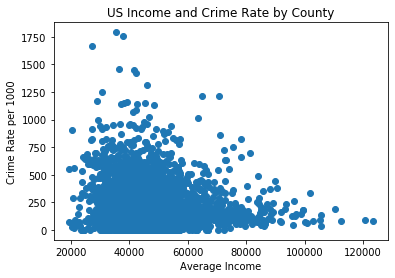

In [111]:
plt.scatter(x=incomecrime_df['Income'], y=incomecrime_df['crime_rate_per_100000'], marker='o')
plt.title("US Income and Crime Rate by County")
plt.xlabel("Average Income")
plt.ylabel("Crime Rate per 1000")
plt.show()

In [112]:
#workstatuscrime_csv = "QRY003 - Workers vs Crime Rate.csv"

In [115]:
povertycrime_csv = "QRY002 - Poverty vs Crime.csv"

In [117]:
povertycrime_df = pd.read_csv(povertycrime_csv)
povertycrime_df

,State code,Crime per 100k,Poverty
0,NE,61.63,11.98
1,ND,94.48,11.42
2,KY,98.72,21.83
3,SD,99.39,16.74
4,ME,115.96,15.10
5,VT,119.25,11.79
6,MN,134.42,11.67
7,OH,138.14,15.33
8,IN,139.12,13.89
9,WI,142.60,12.52


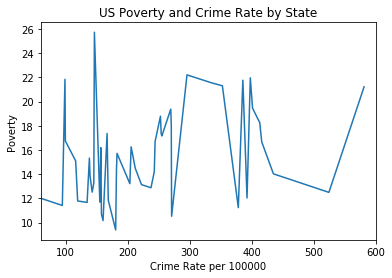

In [122]:
plt.plot(povertycrime_df['Crime per 100k'],povertycrime_df['Poverty'])
#plt.plot(x=povertycrime_df['Poverty'], y=povertycrime_df['Crime per 100k'])
plt.title("US Poverty and Crime Rate by State")
plt.xlabel("Crime Rate per 100000")
plt.ylabel("Poverty")
#plt.locator_params(axis='x', nbins=10)
#plt.set_xlim(60,1220)
#plt.set_ylim(9, 26)
plt.xlim(60, 600)
#plt.ylim(9,26)
plt.show()